# Exploratory Data Analysis
In this script we wish to explore the dataset and analysis on the features

In [1]:
# Import useful packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
# Import custom functions
from scripts.proj1_helpers import *
from scripts.clean_data import *
from scripts.plots import *


In [3]:
data_path = 'data/train.csv'
y, x, ids = load_csv_data(data_path, sub_sample=False)

print('Size of x:', x.shape )

Size of x: (250000, 30)


In [4]:
print(x)
x[x == -999] = np.nan
print(x)

[[ 138.47    51.655   97.827 ...    1.24    -2.475  113.497]
 [ 160.937   68.768  103.235 ... -999.    -999.      46.226]
 [-999.     162.172  125.953 ... -999.    -999.      44.251]
 ...
 [ 105.457   60.526   75.839 ... -999.    -999.      41.992]
 [  94.951   19.362   68.812 ... -999.    -999.       0.   ]
 [-999.      72.756   70.831 ... -999.    -999.       0.   ]]
[[138.47   51.655  97.827 ...   1.24   -2.475 113.497]
 [160.937  68.768 103.235 ...     nan     nan  46.226]
 [    nan 162.172 125.953 ...     nan     nan  44.251]
 ...
 [105.457  60.526  75.839 ...     nan     nan  41.992]
 [ 94.951  19.362  68.812 ...     nan     nan   0.   ]
 [    nan  72.756  70.831 ...     nan     nan   0.   ]]


1. First off all we that we have a lot of values that are set to -999, which can be regarded as undefined.
2. By looking at the data we can see that the feature PRI_jet_num is a categorical feature, and have values 0-3. All others are continious.

To study the distribution of each feature, we plot the distribution of each feature. 

/Users/theodor/anaconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/theodor/anaconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


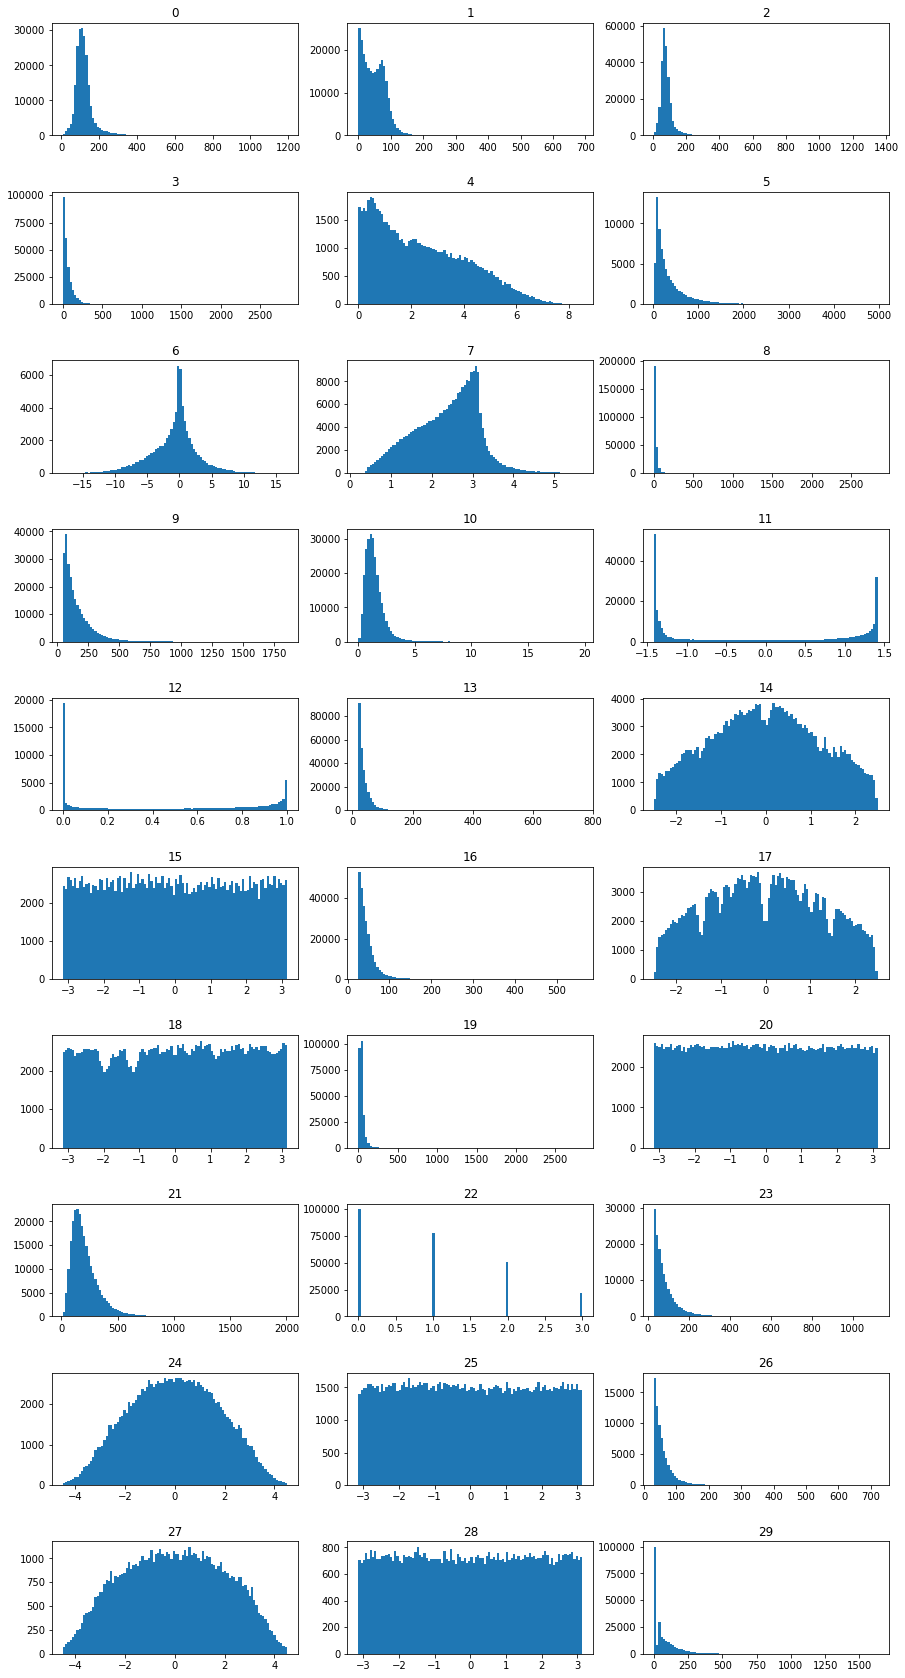

In [5]:
plot_hist(x)

**Correlation Matrix**

In [6]:
pred = np.c_[y,x]
correlation = pd.DataFrame(data=pred).corr()

In [7]:
data = pd.read_csv(data_path)
data['Prediction'].replace('s',1, inplace = True)
data['Prediction'].replace('b',-1, inplace = True)
correlation = data.corr()

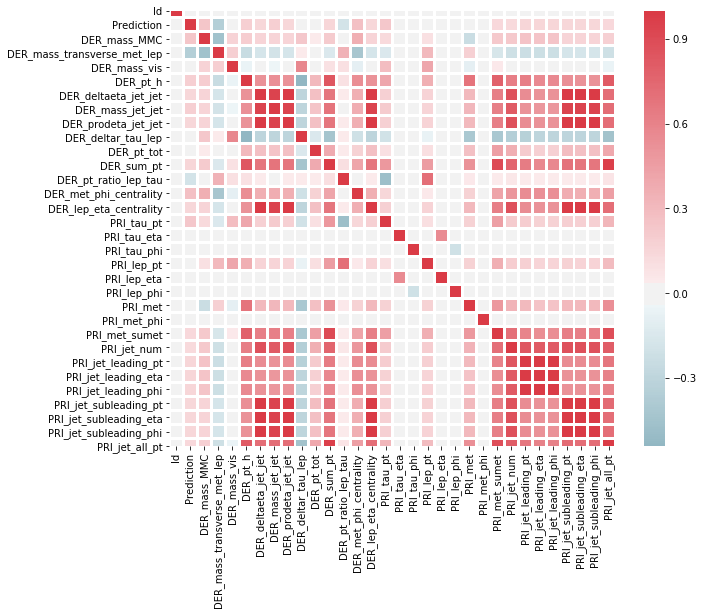

In [8]:
import seaborn as sns
f = plt.figure(figsize = (10,8))
sns.heatmap(correlation, cmap=sns.diverging_palette(220, 10, as_cmap=True), center = 0,  linewidths='2')

We see that some of the features are uncorrelated with the prediction, so we can remove these as they can cause overfitting and issues in the model.  

In [9]:
x_s = x[y == 1]
x_b = x[y == -1]

x_b = x_b[:x_s.shape[0],:]



In [10]:
def dist_hists(hist1, hist2):
    dist = np.linalg.norm(hist1[0]-hist2[0], ord=2)
    return np.sqrt(dist)

Feature nr: 0


/Users/theodor/anaconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/theodor/anaconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


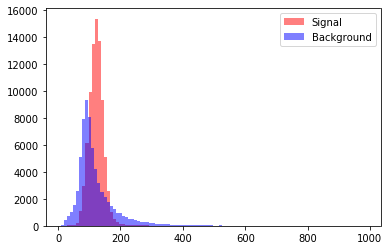

Feature nr: 1


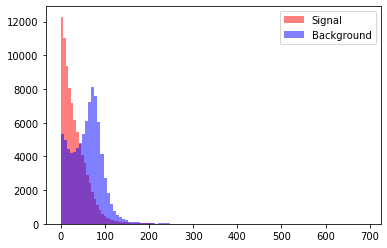

Feature nr: 2


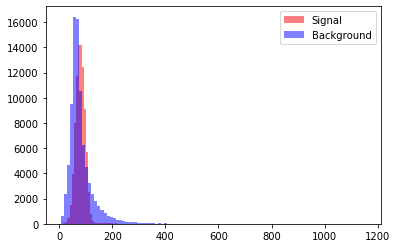

Feature nr: 3


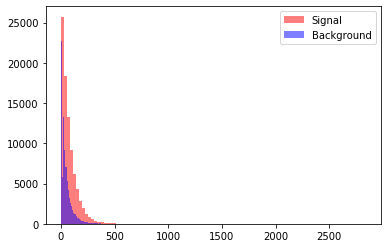

Feature nr: 4


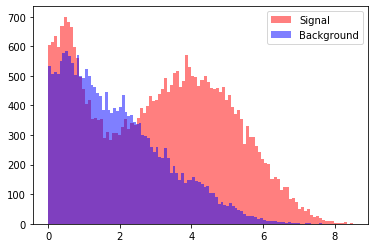

Feature nr: 5


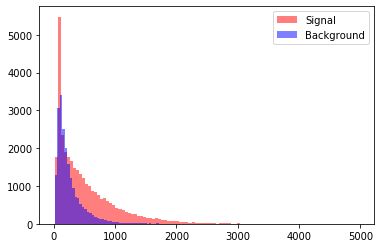

Feature nr: 6


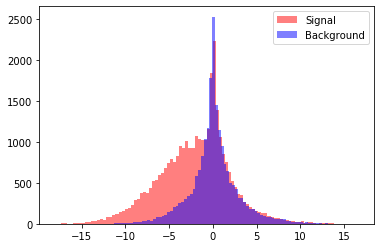

Feature nr: 7


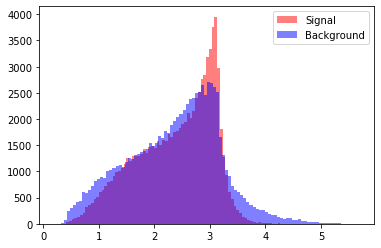

Feature nr: 8


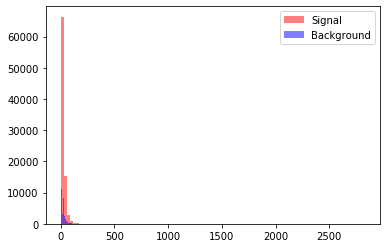

Feature nr: 9


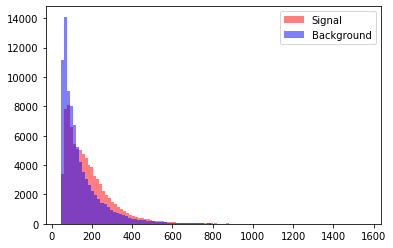

Feature nr: 10


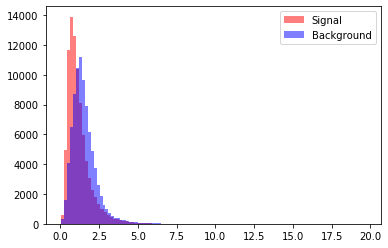

Feature nr: 11


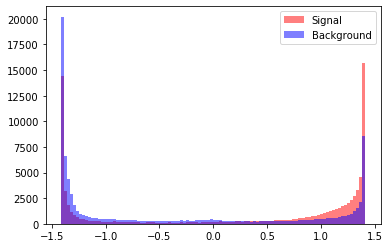

Feature nr: 12


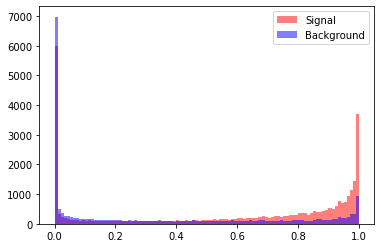

Feature nr: 13


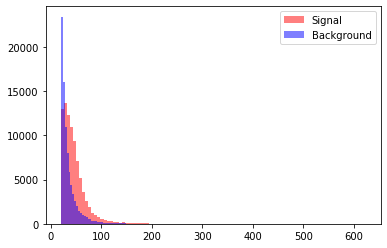

Feature nr: 14


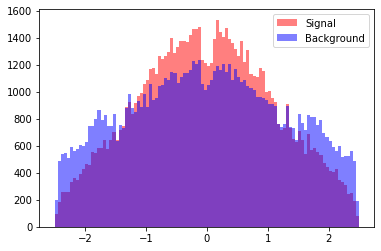

Feature nr: 15


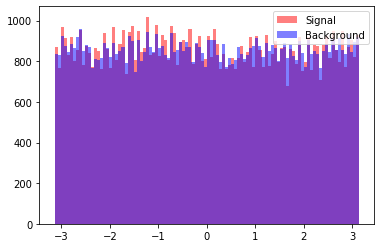

Feature nr: 16


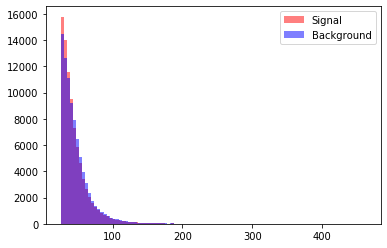

Feature nr: 17


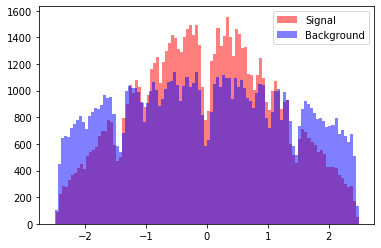

Feature nr: 18


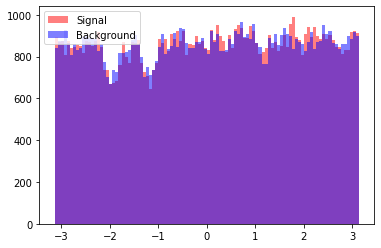

Feature nr: 19


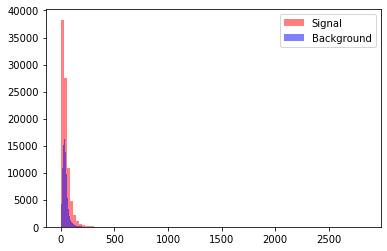

Feature nr: 20


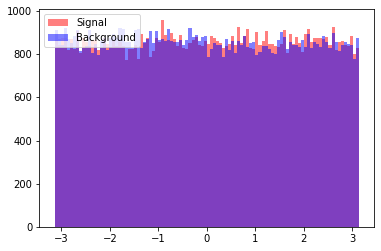

Feature nr: 21


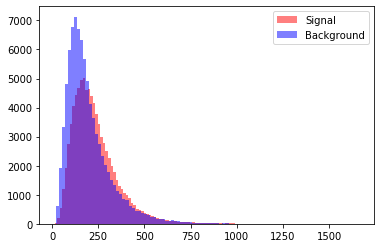

Feature nr: 22


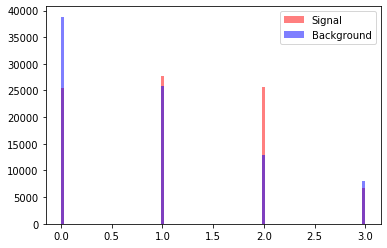

Feature nr: 23


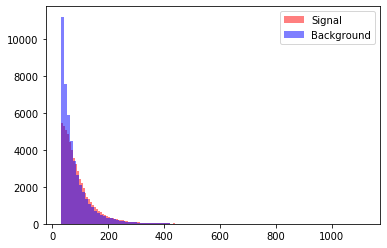

Feature nr: 24


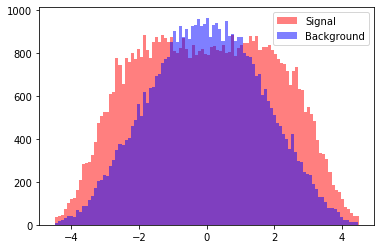

Feature nr: 25


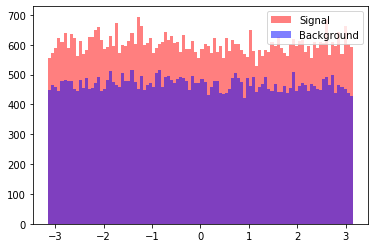

Feature nr: 26


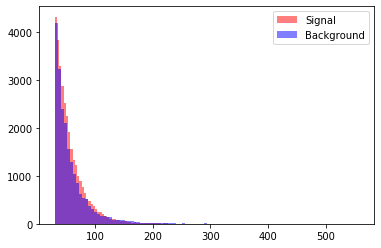

Feature nr: 27


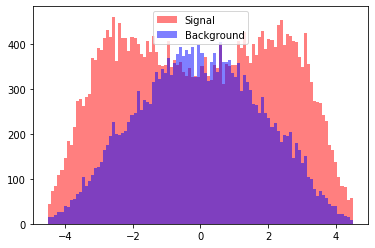

Feature nr: 28


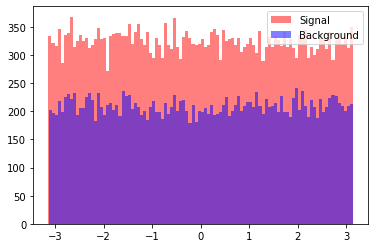

Feature nr: 29


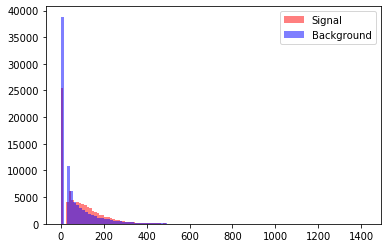

In [11]:
import time
dists = []
for i in range(30):
    print('Feature nr:', i )
    hist1 = plt.hist(x_s[:,i], color = 'r' , alpha = 0.5, bins = 100, label='Signal')
    hist2 = plt.hist(x_b[:,i], color = 'b', alpha = 0.5,  bins = 100, label='Background')
    dists.append(dist_hists(hist1, hist2))
    plt.legend()
    plt.show()
    
    time.sleep(2)

#plot_hist(x_b)
#plt.show()

# Feature Processing
Now we use what we found above to process the data


In [12]:
# Reload data to make sure it is correct
data_path = 'data/train.csv'
y, x, ids = load_csv_data(data_path, sub_sample=False)

print('Size of x:', x.shape )


Size of x: (250000, 30)


1. To start of we set all the values that are undefined (-999) to the median of the column (cannot use the mean as it is affected by outliers.  
2. We then take the log of all columns that are non-negative. This is because we this gives a much nicer distribution of values, as most of them followed the log-power law.
3. Afterwards we apply cosine on the features that are angles.
4. Lastly we remove features which have a poor distribution and a low covariance with prediction. 


In [13]:
x = set_undefined_to_median(x)
x = apply_log(x)
x = apply_cosine_base(x)
x = remove_features(x,[14, 15, 17, 18, 20])
    

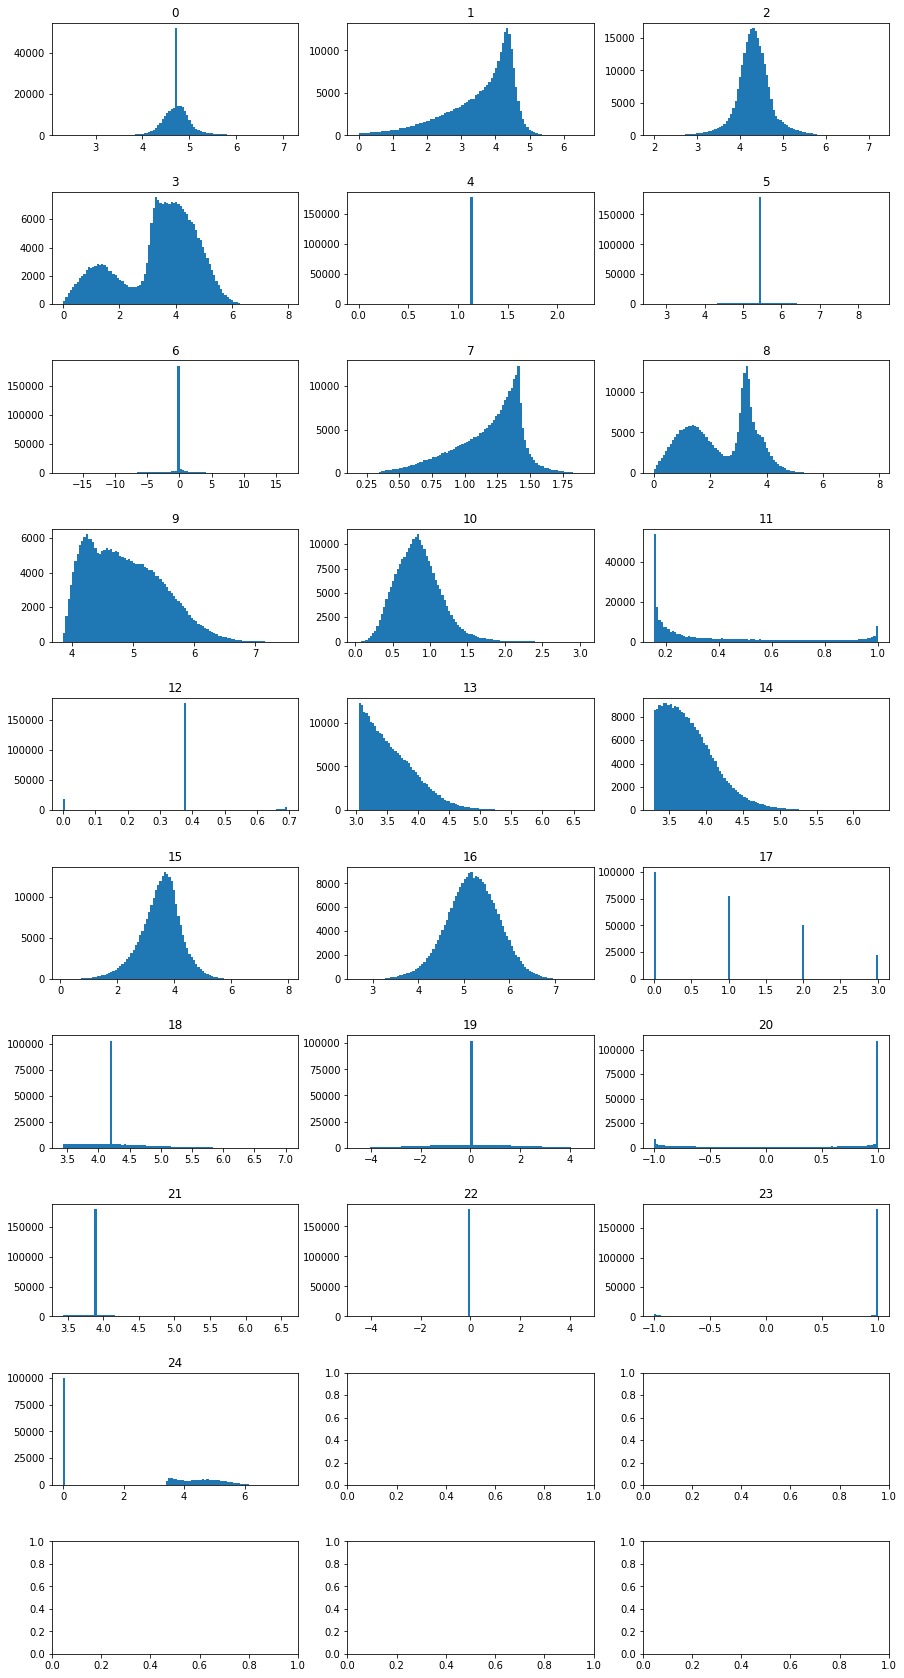

In [14]:
from scripts.plots import plot_hist

plot_hist(x)


As we see in this graph we now have somewhat logical distributions on all the features, although the changing all the nan-values to the median gives many similar values around zero.